## **IMPORTAMOS LAS LIBRERÍAS :**

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image
from pandas import DataFrame, read_excel, merge

In [2]:
#Instalamos tensorrec en anacond prompt: pip install tensorrec==0.26.2
# y lo importamos:    

import tensorrec
import tensorflow as tf

#Instalamos lightfm en anacond prompt: conda install -c conda-forge lightfm
# Nos pregunta: Proceed ([y]/n)? y le respondemos: y
# y lo importamos:

#https://lyst.github.io/lightfm/docs/home.html
#https://towardsdatascience.com/how-to-build-a-movie-recommender-system-in-python-using-lightfm-8fa49d7cbe3b

import lightfm

# Importamos también coo_matrix que nos permitirá armar una matriz más adelante

from scipy.sparse import coo_matrix

In [3]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

## **READ CSV:** 
Descargamos de https://data.buenosaires.gob.ar/dataset/mapa-oportunidades-comerciales-moc el dataset de RUBROS COMERCIALES DE LA CIUDAD DE BUENOS AIRES  del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "Rubros". 

In [4]:
pwd 

'C:\\Users\\mglib\\Desktop\\Federico Libertun\\UTN 2019\\Ciencias de Datos\\Tema para el tp\\Mapa oportunidades comerciales'

In [5]:
#PARA MAC
Rubros = pd.read_csv('rubros.csv', delimiter=';')

#PARA WINDOWS

#data_path = 'C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/'
#Rubros = pd.read_csv(data_path + 'rubros.csv', delimiter=';') #Ejemplo

## **EDA:**  (ANÁLISIS EXPLORATORIO DE DATOS) 

In [6]:
Rubros.head(5)

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,10.00,45.00,15.00,0.00,30.00,2.0,1.0,16.67,16.67
1,2,2,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,...,0.0,18.18,27.27,27.27,27.27,0.00,4.0,1.0,NaN,33.33
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,...,0.0,0.00,0.00,14.29,0.00,85.71,3.0,1.0,NaN,NaN
4,5,5,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Rubros.shape #En total hay 18 rubros y 161 zonas. 18x161 = 2898 que es la cantidad de filas del dataset. 
             #O sea que en este dataset se muestran todos los rubros para cada zona.

(2898, 22)

In [8]:
Rubros_nulls = Rubros.isnull().any()
Rubros_nulls

MOC_RUBROS_ID                    False
MOC_ZONAS_ID                     False
RUBRO                            False
NIVEL_RIESGO                      True
FACTURACION_PROM_ACTUAL           True
INDICE_CRECIMIENTO                True
INDICE_ESTABILIDAD                True
INDICE_APERTURA                  False
INDICE_CIERRE                    False
INDICE_SUPERVIVENCIA              True
IND_AP_ACT_VS_IND_AP_ANIO_ANT     True
IND_CL_ACT_VS_IND_CL_ANIO_ANT     True
SUP_MENOS_1                       True
SUP_ENTRE_1_Y_2                   True
SUP_ENTRE_2_Y_3                   True
SUP_ENTRE_3_Y_4                   True
SUP_ENTRE_4_Y_5                   True
SUP_MAS_5                         True
FACTURACION_PROM_ANIO_ANT         True
NIVEL_LOCALES                     True
INDICE_CIERRE_ANIO_ANT            True
INDICE_APERTURA_ANIO_ANT          True
dtype: bool

In [9]:
total_Rubro = Rubros.isnull().sum().sort_values(ascending=False)
percent_Rubro = (Rubros.isnull().sum()/Rubros.isnull().count()).sort_values(ascending=False)
missing_data_Rubro = np.round(pd.concat([total_Rubro, percent_Rubro], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubro.head(17)

,Total,Percent
INDICE_CIERRE_ANIO_ANT,1510,0.52
IND_CL_ACT_VS_IND_CL_ANIO_ANT,1502,0.52
INDICE_APERTURA_ANIO_ANT,832,0.29
IND_AP_ACT_VS_IND_AP_ANIO_ANT,831,0.29
INDICE_SUPERVIVENCIA,360,0.12
INDICE_CRECIMIENTO,186,0.06
FACTURACION_PROM_ACTUAL,170,0.06
NIVEL_LOCALES,155,0.05
FACTURACION_PROM_ANIO_ANT,154,0.05
INDICE_ESTABILIDAD,149,0.05


In [10]:
Rubros.columns

Index(['MOC_RUBROS_ID', 'MOC_ZONAS_ID', 'RUBRO', 'NIVEL_RIESGO',
       'FACTURACION_PROM_ACTUAL', 'INDICE_CRECIMIENTO', 'INDICE_ESTABILIDAD',
       'INDICE_APERTURA', 'INDICE_CIERRE', 'INDICE_SUPERVIVENCIA',
       'IND_AP_ACT_VS_IND_AP_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
       'SUP_MENOS_1', 'SUP_ENTRE_1_Y_2', 'SUP_ENTRE_2_Y_3', 'SUP_ENTRE_3_Y_4',
       'SUP_ENTRE_4_Y_5', 'SUP_MAS_5', 'FACTURACION_PROM_ANIO_ANT',
       'NIVEL_LOCALES', 'INDICE_CIERRE_ANIO_ANT', 'INDICE_APERTURA_ANIO_ANT'],
      dtype='object')

In [11]:
Rubros.describe()

,MOC_RUBROS_ID,MOC_ZONAS_ID,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,IND_AP_ACT_VS_IND_AP_ANIO_ANT,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
count,2898.000000,2898.000000,2749.000000,2728.000000,2712.000000,2749.000000,2898.000000,2898.000000,2538.000000,2067.000000,...,2785.000000,2785.000000,2785.000000,2785.000000,2785.00000,2785.000000,2744.000000,2743.000000,1388.000000,2066.000000
mean,1449.500000,81.000000,1.779920,3.523460,3.362463,3.242270,4.424896,2.440901,85.994878,-72.811572,...,3.209436,11.852560,12.950671,11.553896,7.73265,52.700664,3.495262,1.813708,12.922370,21.772386
std,836.724865,46.483821,1.043426,1.561888,0.977561,0.986932,9.507299,6.971838,26.890169,44.634215,...,7.292053,15.058441,14.047338,13.700888,11.11506,22.736519,1.566829,1.223673,14.200312,18.096290
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-100.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.030000,2.130000
25%,725.250000,41.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,80.000000,-100.000000,...,0.000000,2.500000,0.000000,0.000000,0.00000,41.430000,2.000000,1.000000,5.260000,11.110000
50%,1449.500000,81.000000,1.000000,4.000000,4.000000,4.000000,0.000000,0.000000,100.000000,-100.000000,...,0.880000,8.910000,10.530000,8.820000,5.45000,55.560000,4.000000,1.000000,8.720000,16.670000
75%,2173.750000,121.000000,2.000000,5.000000,4.000000,4.000000,5.560000,2.440000,100.000000,-60.000000,...,3.850000,15.100000,17.780000,15.790000,10.89000,66.670000,5.000000,2.000000,15.000000,25.000000
max,2898.000000,161.000000,5.000000,5.000000,5.000000,5.000000,100.000000,100.000000,100.000000,300.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,5.000000,5.000000,150.000000,200.000000


In [12]:
Rubros_1 = Rubros.drop(['INDICE_CIERRE_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
                        'INDICE_APERTURA_ANIO_ANT','FACTURACION_PROM_ANIO_ANT','IND_AP_ACT_VS_IND_AP_ANIO_ANT'], axis=1)

Rubros_1.replace(np.nan, 0, inplace = True) #Reemplazamos los Nans por 0, la diferencia entre este ipynb y el de clasificación y recomendación pasa por este elemento

In [13]:
total_Rubros_1 = Rubros_1.isnull().sum().sort_values(ascending=False)
percent_Rubros_1 = (Rubros_1.isnull().sum()/Rubros_1.isnull().count()).sort_values(ascending=False)
missing_data_Rubros_1 = np.round(pd.concat([total_Rubros_1, percent_Rubros_1], axis=1, keys=['Total', 'Percent']),2)
missing_data_Rubros_1.head(5)

,Total,Percent
NIVEL_LOCALES,0,0.0
INDICE_APERTURA,0,0.0
MOC_ZONAS_ID,0,0.0
RUBRO,0,0.0
NIVEL_RIESGO,0,0.0


In [14]:
Rubros_1.shape

(2898, 17)

In [15]:
Rubros_1.head()

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,NIVEL_LOCALES
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,0.0,10.00,45.00,15.00,0.00,30.00,1.0
1,2,2,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,0.0,18.18,27.27,27.27,27.27,0.00,1.0
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,0.0,0.00,0.00,14.29,0.00,85.71,1.0
4,5,5,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0


Creamos la columna Nivel_de_seguridad a partir de la columna Nivel_riesgo. Para eso la completamos de la siguiente manera:
    
Si en Nivel_Riesgo dice 5, en Nivel_de_seguridad deberá decir 1, o sea lo contrario.

Si dice 4, en la otra deberá decir 2.

Si dice 3, 3.

Si dice 2, 4.

Si dice 1, 5.

En el caso que diga 0 la dejamos como está, ya que 0 representa que no hay datos disponibles.

Esto se hace para que a mayor índice, mejor es y poder compararlo de esa forma con las columnas:

- FACTURACION_PROM_ACTUAL
- INDICE_CRECIMIENTO
- INDICE_ESTABILIDAD
- Nivel_de_seguridad

In [16]:
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==5),'Nivel_de_seguridad'] = 1
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==4),'Nivel_de_seguridad'] = 2
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==3),'Nivel_de_seguridad'] = 3
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==2),'Nivel_de_seguridad'] = 4
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==1),'Nivel_de_seguridad'] = 5
Rubros_1.loc[(Rubros_1['NIVEL_RIESGO']==0),'Nivel_de_seguridad'] = 0

In [17]:
Rubros_1.head()

#Visualizar la última columna donde se ubica la columna creada "NIVEL DE SEGURIDAD"

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,NIVEL_LOCALES,Nivel_de_seguridad
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,0.0,10.00,45.00,15.00,0.00,30.00,1.0,1.0
1,2,2,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,0.0,18.18,27.27,27.27,27.27,0.00,1.0,5.0
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,0.0,0.00,0.00,14.29,0.00,85.71,1.0,5.0
4,5,5,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0


## **CREAMOS INDICE DE RECOMENDACIÓN:** 

In [18]:
#Multiplico las columnas para obtener un puntaje y ver cuál es el rubro más recomendable para cada zona o la/s mejor/es zona/s para cada rubro.
a = np.multiply(Rubros_1['FACTURACION_PROM_ACTUAL'],Rubros_1['INDICE_CRECIMIENTO'])
b = np.multiply(Rubros_1['INDICE_ESTABILIDAD'],Rubros_1['Nivel_de_seguridad'])
Rubros_1['Índice_de_Recomendación'] = np.multiply(a,b)

In [19]:
Rubros_1.head()

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,NIVEL_LOCALES,Nivel_de_seguridad,Índice_de_Recomendación
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,0.0,10.00,45.00,15.00,0.00,30.00,1.0,1.0,3.0
1,2,2,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,0.0,18.18,27.27,27.27,27.27,0.00,1.0,5.0,160.0
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,0.0,0.00,0.00,14.29,0.00,85.71,1.0,5.0,160.0
4,5,5,INSUMOS PARA EL HOGAR,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [20]:
data = Rubros_1.Índice_de_Recomendación

In [21]:
nombres_de_los_rubros = len (Rubros_1['RUBRO'].unique())

In [22]:
print (f'En total hay {nombres_de_los_rubros} labels de Install\r\n')
print ("\n",Rubros_1['RUBRO'].unique())

En total hay 18 labels de Install


 ['INSUMOS PARA EL HOGAR' 'BARES Y CAFES' 'CARNES Y VERDURAS'
 'COMIDA AL PASO' 'SALUD Y COSMETICA' 'FERRETERIA Y CONSTRUCCION'
 'FIAMBRERIAS Y DIETETICAS' 'INSTITUCIONES DEPORTIVAS' 'HELADERIAS'
 'KIOSCOS Y LOTERIAS' 'MUSICA Y LIBRERIA' 'OPTICA Y JOYERIAS' 'PANADERIAS'
 'TRATAMIENTOS ESTETICOS' 'RESTAURANTES' 'SUPERMERCADOS Y ALMACENES'
 'INDUMENTARIA' 'VETERINARIA']


 ## **CREAMOS TABLA PIVOTE :** 
 CREAMOS PIVOT TABLE PARA RESUMIR LOS DATOS DE NUESTRO DATAFRAME PARA PODER MOSTRAR COMO SE RELACIONAN LAS VARIABLES DE LOS RUBROS EN CADA ZONA GEOMÉTRICA, EN BASE AL INDICE DE RECOMENDACIÓN CREADO

In [23]:
matrix = Rubros_1.pivot(index='RUBRO', columns='MOC_ZONAS_ID', values='Índice_de_Recomendación')

In [24]:
matrix.fillna(0, inplace=True)

In [25]:
matrix

MOC_ZONAS_ID,1,2,3,4,5,6,7,8,9,10,...,152,153,154,155,156,157,158,159,160,161
RUBRO,,,,,,,,,,,,,,,,,,,,,
BARES Y CAFES,120.0,0.0,0.0,45.0,0.0,60.0,300.0,0.0,3.0,40.0,...,72.0,160.0,48.0,240.0,2.0,30.0,120.0,320.0,48.0,60.0
CARNES Y VERDURAS,200.0,0.0,96.0,200.0,0.0,24.0,250.0,0.0,120.0,300.0,...,160.0,10.0,96.0,60.0,90.0,200.0,300.0,160.0,120.0,45.0
COMIDA AL PASO,300.0,200.0,80.0,400.0,0.0,20.0,200.0,0.0,240.0,72.0,...,120.0,16.0,240.0,8.0,40.0,375.0,192.0,300.0,96.0,6.0
FERRETERIA Y CONSTRUCCION,400.0,80.0,400.0,192.0,0.0,400.0,400.0,0.0,400.0,160.0,...,240.0,96.0,320.0,400.0,108.0,320.0,54.0,240.0,320.0,300.0
FIAMBRERIAS Y DIETETICAS,200.0,0.0,9.0,300.0,0.0,100.0,80.0,0.0,18.0,250.0,...,50.0,180.0,400.0,160.0,80.0,64.0,16.0,15.0,48.0,192.0
HELADERIAS,40.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,...,400.0,0.0,80.0,40.0,240.0,40.0,80.0,0.0,200.0,200.0
INDUMENTARIA,160.0,0.0,80.0,60.0,500.0,120.0,400.0,40.0,192.0,200.0,...,60.0,144.0,120.0,200.0,80.0,72.0,160.0,180.0,60.0,400.0
INSTITUCIONES DEPORTIVAS,40.0,500.0,60.0,30.0,500.0,0.0,40.0,0.0,400.0,400.0,...,80.0,20.0,1.0,240.0,500.0,120.0,500.0,400.0,160.0,4.0
INSUMOS PARA EL HOGAR,3.0,0.0,160.0,160.0,0.0,200.0,500.0,0.0,400.0,160.0,...,72.0,160.0,100.0,400.0,6.0,75.0,54.0,300.0,18.0,300.0


Las filas en la matriz corresponden a los rubros y las columnas a las zonas; por lo tanto las entradas corresponden a las calificaciones otorgadas por cada rubro en cada zona.
Nuestra matriz sigue siendo un objeto de tipo DataFrame, para poder aplicar el modelo de recomendación debemos pasarlo a una matriz numpy.

El comando tolist() se encarga de transformarlo en numpy.

In [26]:
np.shape (matrix)

(18, 161)

In [27]:
Rubros = matrix.index.tolist()
Zonas = matrix.columns.tolist()
matrix = matrix.as_matrix()

In [28]:
# Nos queda de la siguiente manera:

matrix

array([[120.,   0.,   0., ..., 320.,  48.,  60.],
       [200.,   0.,  96., ..., 160., 120.,  45.],
       [300., 200.,  80., ..., 300.,  96.,   6.],
       ...,
       [400., 500., 400., ..., 400., 320., 300.],
       [ 20.,   0.,   0., ...,  54.,  72., 160.],
       [ 40.,  80.,   0., ..., 192.,  36.,   0.]])

# APLICAMOS EL MODELO DE RECOMENDACIÓN
Utilizamos para ello LIGHT FM, https://github.com/lyst/lightfm

**IMPORTAMOS LAS LIBRERÍAS DE ESTE MODELO**

In [29]:
#Librerias para el modelo
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score, reciprocal_rank
from lightfm import LightFM
import threading

**CREAMOS LA CO-MATRIX**

Es similar a la tabla pivote creada anteriormente para visualización pero es la forma que el entorno light fm para poder procesar luego los datos

In [30]:
recom_data = coo_matrix(matrix, dtype=np.float32)

**DEFINIMOS LOS HIPER - PARÁMETROS DEL MODELO**

In [31]:
#Definición de hyperparámetros
test_percentage = 0.2
random_state = np.random.RandomState(seed=50)
no_components = 10
k = 4
n = 10
learning_schedule = 'adagrad' #https://lyst.github.io/lightfm/docs/examples/learning_schedules.html
loss = 'warp' #FUNCIÓN COSTO #https://medium.com/@gabrieltseng/intro-to-warp-loss-automatic-differentiation-and-pytorch-b6aa5083187a
learning_rate = 0.05
item_alpha = 0.0001
user_alpha = 0.0001
max_sampled = 10
epochs = 30
num_threads = threading.active_count()

**SEPARAMOS AL MODELO EN TRAIN Y TEST**

Se asigno un 20% para el test, mientras que queda un 80% para el train

In [32]:
train, test = random_train_test_split(recom_data, test_percentage=test_percentage, random_state=random_state)

**INTRODUCIMOS EL MODELO LIGHT FM**



In [33]:
model = LightFM(no_components=no_components, k=k, learning_schedule=learning_schedule, learning_rate=learning_rate, item_alpha=item_alpha, user_alpha=user_alpha, max_sampled=max_sampled, random_state=random_state)
#https://lyst.github.io/lightfm/docs/lightfm.html

**ENTRENAMIENTO DEL MODELO**

In [34]:
model.fit(interactions=train, epochs=epochs, num_threads=num_threads)

**EVALUAMOS EL MODELO**

Los siguientes métodos de evaluación fueron sacadas del siguientes link: https://lyst.github.io/lightfm/docs/lightfm.evaluation.html

PRECISIÓN K - MÉTRICA 

la fracción de positivos conocidos en las primeras k posiciones de la lista clasificada de resultados. Se obtiene la matriz Numpy que contiene puntajes de precisión k para cada usuario. Si no hay interacciones para un usuario determinado, la precisión devuelta será 0

In [35]:
print('Train precision: %.2f' % (precision_at_k(model=model, test_interactions=train, train_interactions=None, k=k, num_threads=num_threads).mean()))
print('Test precision: %.2f' % (precision_at_k(model, test_interactions=test, train_interactions=train, k=k, num_threads=num_threads).mean()))

Train precision: 0.97
Test precision: 0.92


EVALUACIÓN RECALL

Mida el recuerdo en la métrica k para un modelo: el número de elementos positivos en las primeras k posiciones de la lista clasificada de resultados dividido por el número de elementos positivos en el período de prueba. Una puntuación perfecta es 1.0. 

La matriz Numpy que contiene las puntuaciones de recordar @ k para cada usuario. Si no hay interacciones para un usuario dado que tiene elementos en el período de prueba, la recuperación devuelta será 0.

In [36]:
print('Train recall: %.2f' % (recall_at_k(model=model, test_interactions=train, train_interactions=None, k=k, num_threads=num_threads).mean()))
print('Test recall: %.2f' % (recall_at_k(model, test_interactions=test, train_interactions=train, k=k, num_threads=num_threads).mean()))

Train recall: 0.03
Test recall: 0.12


**AUC ROC** (ÁREA BAJO LA CURVA)

Mide la métrica ROC AUC para un modelo: la probabilidad de que un ejemplo positivo elegido al azar tenga una puntuación más alta que un ejemplo negativo elegido al azar. Una puntuación perfecta es 1.0.

In [37]:
print('Train AUC score: %.2f' % (auc_score(model=model, test_interactions=train, train_interactions=None, num_threads=num_threads).mean()))
print('Test AUC score: %.2f' % (auc_score(model, test_interactions=test, train_interactions=train, num_threads=num_threads).mean()))

Train AUC score: 0.68
Test AUC score: 0.86


RANKING RECÍPROCO

Mida la métrica de rango recíproco para un modelo: 1 / el rango del ejemplo positivo mejor clasificado. Una puntuación perfecta es 1.0.

In [38]:
print('Train reciprocal rank: %.2f' % (reciprocal_rank(model=model, test_interactions=train, train_interactions=None, num_threads=num_threads).mean()))
print('Test reciprocal rank: %.2f' % (reciprocal_rank(model, test_interactions=test, train_interactions=train, num_threads=num_threads).mean()))

Train reciprocal rank: 0.97
Test reciprocal rank: 0.97


# MAPA

Queremos llevar en un mapa los resultados, de tal manera que para cada rubro nos indique en qué zonas conviene ubicarlo. Vamos a abrir el archivo donde se encuentra almacenado el mapa de Buenos Aires con sus zonas. Los datos para poder ejecutarlos los sacamos del siguiente link :
https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [39]:
%matplotlib inline

In [40]:
import shapefile as shp

In [41]:
shp_path = 'C:/Users/mglib/Desktop/Federico Libertun/UTN 2019/Ciencias de Datos/Tema para el tp/Mapa oportunidades comerciales/zonas/caba_zona.shp'
sf = shp.Reader(shp_path)


VISUALIZAMOS

Miramos la cantidad de zonas predefinidas, y visualizamos como es la estructura de cada zona

In [42]:
len(sf.shapes())

161

In [43]:
sf.records()[1]

Record #1: ['2', '014_10']

In [44]:
sf.records()[5]

Record #5: ['6', '004_1']

In [45]:
sf.records()[25]

Record #25: ['26', '010_15, 010_17, 010_16']

**LEEMOS LAS COORDENADAS ESPECÍFICAS**

In [46]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [47]:
df = read_shapefile(sf)
df.shape

(161, 3)

In [48]:
df.sample(5)

#En la última columna tenemos los datos de las coordenadas (latitud y longitud), son las que nos permiten crear el mapa

,zone_id,link_zones,coords
58,59,"005_16, 005_17","[(-58.41256351968518, -34.62041603136142), (-5..."
153,154,015_3,"[(-58.4605306414287, -34.580771577962004), (-5..."
55,56,005_22,"[(-58.425759383110986, -34.63145780441796), (-..."
155,156,"003_19, 003_20","[(-58.40135333119139, -34.61443165195108), (-5..."
65,66,"014_21, 014_12, 014_20, 014_15, 014_19, 014_14","[(-58.43375745971892, -34.59185091509674), (-5..."


**VISUALIZAMOS UNA ZONA EN ESPECÍFICO**

In [49]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-58.4493467140631, -34.639785184912625)

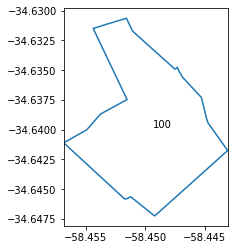

In [50]:
# VISUALIZAMOS LA COLUMNA 100
comuna = '100'
com_id = df[df.zone_id == comuna].index.get_values()[0]
plot_shape(com_id, comuna)

**VISUALIZAMOS EL MAPA POR COMPLETO**

In [51]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (20,18)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

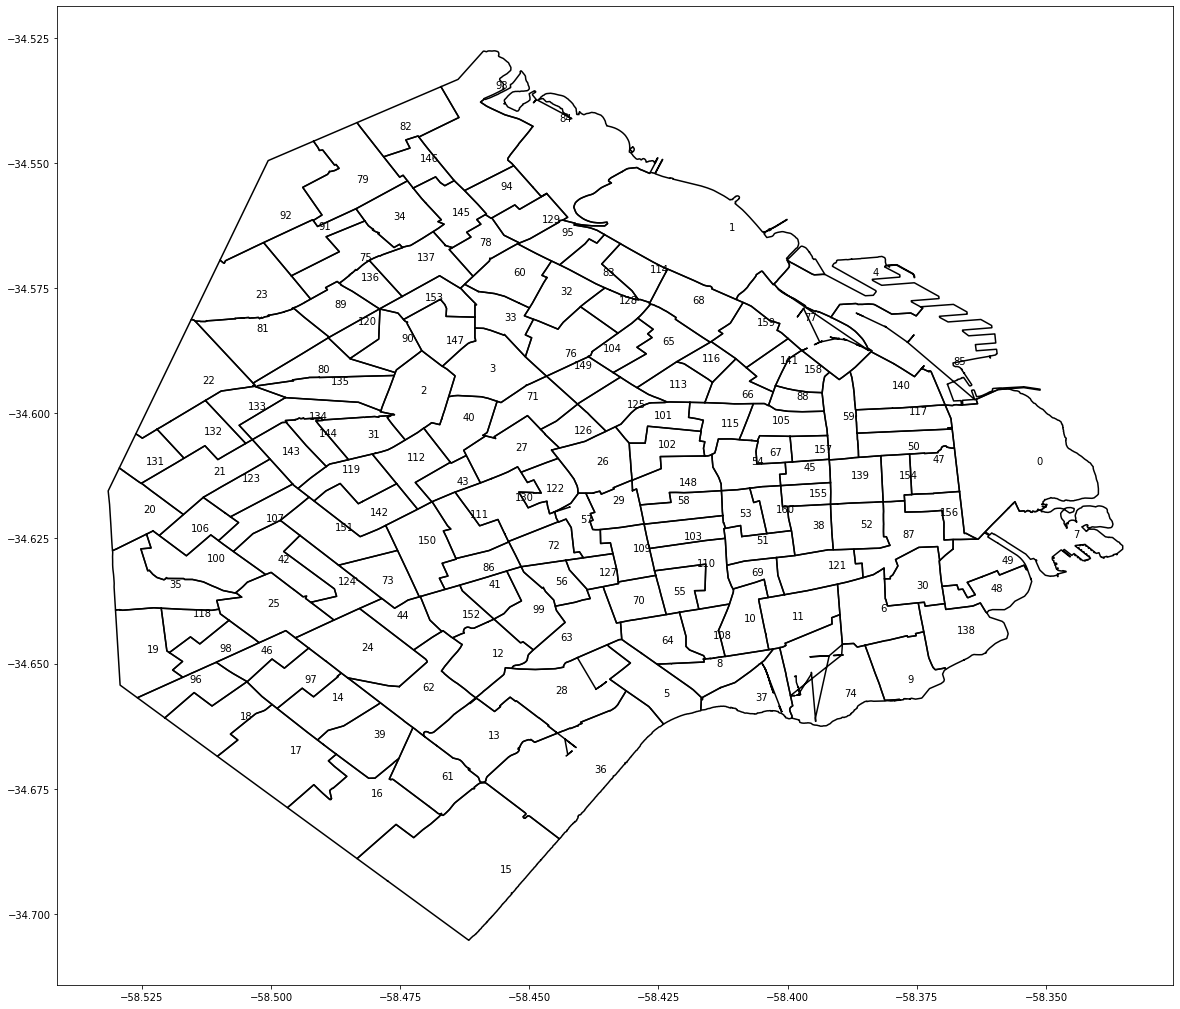

In [52]:
plot_map(sf)

# HEATMAP POR RUBRO

In [53]:
Rubros_byc = Rubros_1.loc[Rubros_1['RUBRO']=='BARES Y CAFES']
Rubros_byc.head()

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,NIVEL_LOCALES,Nivel_de_seguridad,Índice_de_Recomendación
161,162,1,BARES Y CAFES,2.0,5.0,2.0,3.0,0.0,7.69,100.0,0.0,6.82,18.18,13.64,11.36,50.0,1.0,4.0,120.0
162,163,2,BARES Y CAFES,1.0,1.0,0.0,2.0,100.0,0.00,0.0,100.0,0.00,0.00,0.00,0.00,0.0,1.0,5.0,0.0
163,164,3,BARES Y CAFES,1.0,0.0,0.0,3.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,100.0,1.0,5.0,0.0
164,165,4,BARES Y CAFES,1.0,1.0,3.0,3.0,0.0,0.00,100.0,0.0,5.56,38.89,5.56,0.00,50.0,1.0,5.0,45.0
165,166,5,BARES Y CAFES,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [54]:
def calc_color(data, color=None):
    if color   == 1:
        color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                    '#807dbaF0','#6a51a3F0','#54278fF0']
        colors = 'Purples'
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                    '#1d91c0','#225ea8','#253494']
        colors = 'YlGnBu'
    elif color == 3:
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                    '#969696','#636363','#252525']
        colors = 'Greys'
    elif color == 9:
        color_sq = ['#ff0000','#ff0000','#ff0000',
                    '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f',
                    '#fe9929','#d95f0e','#993404']
        colors = 'YlOrBr'
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
        for i in range(6):
            print("\n"+str(i+1)+': '+str(int(bins[i]))+ " => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")
    return color_ton, bins

In [55]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        #i = conv_comuna(i).upper()
        comuna_id.append(df[df.zone_id == str(i)].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, print_id, color_ton, bins, x_lim=None, y_lim=None, figsize=(11, 9))

In [56]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna, print_id, color_ton, bins, x_lim=None, y_lim=None, figsize=(11, 9)):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:     
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)

    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

**VISUALIZAMOS EL HEATMAP DEL RUBRO ("COMIDA AL PASO")**

Con esto vamos a visualizar en este rubro donde conviene invertir en que zona de la Ciudad Autonóma de Buenos Aires en base al índice de recomendación creado anteriormente


1: 0 => 17 
2: 18 => 47 
3: 48 => 71 
4: 72 => 119 
5: 120 => 199 
6: 200 => 499 

   1   2   3   4   5   6


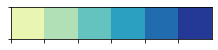

<Figure size 792x648 with 0 Axes>

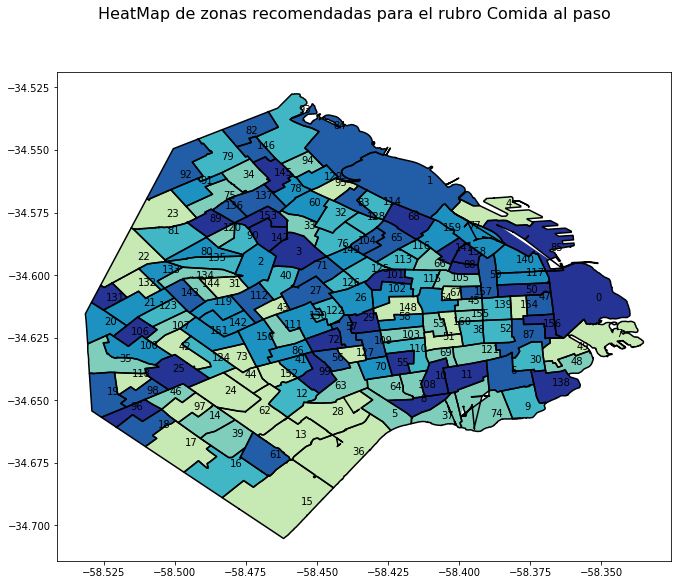

In [57]:
title = 'HeatMap de zonas recomendadas para el rubro Comida al paso'
data = Rubros_1.loc[Rubros_1['RUBRO']=='COMIDA AL PASO'].Índice_de_Recomendación
names = Rubros_1.loc[Rubros_1['RUBRO']=='COMIDA AL PASO'].MOC_ZONAS_ID
plot_comunas_data(sf, title, names, data, 2, True)

**VISUALIZAMOS EL HEATMAP DEL RUBRO ("BARES Y CAFE")**

Con esto vamos a visualizar en este rubro donde conviene invertir en que zona de la Ciudad Autonóma de Buenos Aires en base al índice de recomendación creado anteriormente


1: 0 => 23 
2: 24 => 59 
3: 60 => 95 
4: 96 => 131 
5: 132 => 199 
6: 200 => 399 

   1   2   3   4   5   6


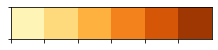

<Figure size 792x648 with 0 Axes>

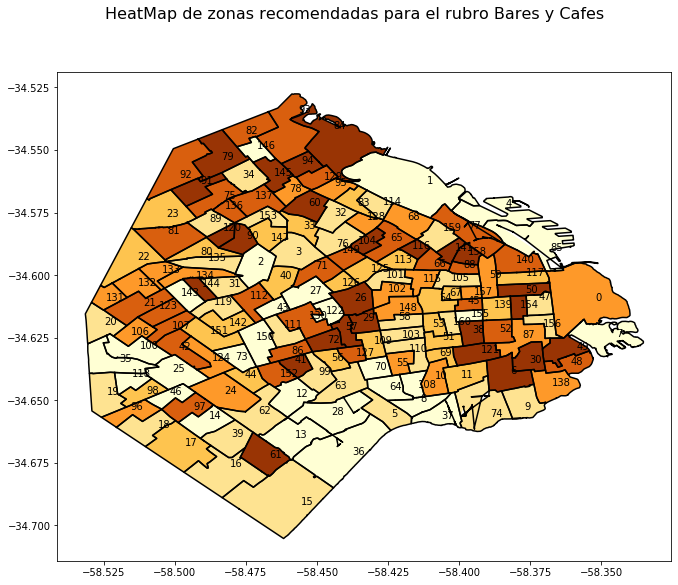

In [58]:
title = 'HeatMap de zonas recomendadas para el rubro Bares y Cafes'
data = Rubros_1.loc[Rubros_1['RUBRO']=='BARES Y CAFES'].Índice_de_Recomendación
names = Rubros_1.loc[Rubros_1['RUBRO']=='BARES Y CAFES'].MOC_ZONAS_ID
plot_comunas_data(sf, title, names, data, 4, True)

**VISUALIZAMOS EL HEATMAP DEL RUBRO ("RESTAURANTES")**

Con esto vamos a visualizar en este rubro donde conviene invertir en que zona de la Ciudad Autonóma de Buenos Aires en base al índice de recomendación creado anteriormente


1: 0 => 27 
2: 28 => 79 
3: 80 => 119 
4: 120 => 179 
5: 180 => 299 
6: 300 => 499 

   1   2   3   4   5   6


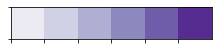

<Figure size 792x648 with 0 Axes>

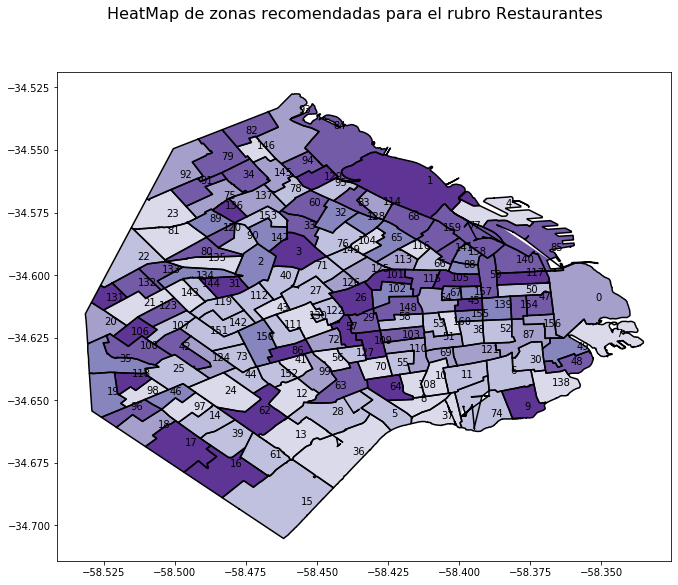

In [59]:
title = 'HeatMap de zonas recomendadas para el rubro Restaurantes'
data = Rubros_1.loc[Rubros_1['RUBRO']=='RESTAURANTES'].Índice_de_Recomendación
names = Rubros_1.loc[Rubros_1['RUBRO']=='RESTAURANTES'].MOC_ZONAS_ID
plot_comunas_data(sf, title, names, data, 1, True)